<a href="https://colab.research.google.com/github/shruti24101729/Data-Analysis-and-Visualization/blob/main/pandasDataScience2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
   #pivot table works on categorical columns

import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
df=sns.load_dataset('tips')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [ ]:
df.groupby('sex')[['total_bill']].mean()

<ipython-input-3-f44286c1a160>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('sex')[['total_bill']].mean()


,total_bill
sex,
Male,20.744076
Female,18.056897


In [ ]:
df.groupby(['sex','smoker'])[['total_bill']].mean().unstack()

<ipython-input-7-19160ad1a132>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['sex','smoker'])[['total_bill']].mean().unstack()


total_bill           
smoker        Yes         No
sex                         
Male    22.284500  19.791237
Female  17.977879  18.105185

In [ ]:
#method 2 using pivot table
df.pivot_table(values='total_bill',index='sex',columns='smoker')

<ipython-input-8-e6aa7f29bfce>:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(values='total_bill',index='sex',columns='smoker')


smoker,Yes,No
sex,,
Male,22.284500,19.791237
Female,17.977879,18.105185


In [ ]:
df.pivot_table(values='total_bill',index='sex',columns='smoker',aggfunc='sum',margins=True)#std,count

<ipython-input-12-b36556c0feb6>:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(values='total_bill',index='sex',columns='smoker',aggfunc='sum',margins=True)#std,count


smoker,Yes,No,All
sex,,,
Male,1337.07,1919.75,3256.82
Female,593.27,977.68,1570.95
All,1930.34,2897.43,4827.77


In [ ]:
#df.pivot_table(index='sex',columns='smoker)
df.pivot_table(index=['sex','smoker'],columns=['day','time'],values='total_bill')

<ipython-input-14-d3356ec2fe69>:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index=['sex','smoker'],columns=['day','time'],values='total_bill')


day                 Thur               Fri                Sat        Sun
time               Lunch Dinner      Lunch  Dinner     Dinner     Dinner
sex    smoker                                                           
Male   Yes     19.171000    NaN  11.386667  25.892  21.837778  26.141333
       No      18.486500    NaN        NaN  17.475  19.929063  20.403256
Female Yes     19.218571    NaN  13.260000  12.200  20.266667  16.540000
       No      15.899167  18.78  15.980000  22.750  19.003846  20.824286

In [ ]:
df.pivot_table(index=['sex','smoker'],columns=['day','time'],aggfunc={'size':'mean','tip':'max','total_bill':'sum'})

<ipython-input-15-d350dfc1c2fd>:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index=['sex','smoker'],columns=['day','time'],aggfunc={'size':'mean','tip':'max','total_bill':'sum'})


size                                               tip  \
day                Thur              Fri              Sat       Sun  Thur   
time              Lunch Dinner     Lunch Dinner    Dinner    Dinner Lunch   
sex    smoker                                                               
Male   Yes     2.300000    NaN  1.666667    2.4  2.629630  2.600000  5.00   
       No      2.500000    NaN       NaN    2.0  2.656250  2.883721  6.70   
Female Yes     2.428571    NaN  2.000000    2.0  2.200000  2.500000  5.00   
       No      2.500000    2.0  3.000000    2.0  2.307692  3.071429  5.17   

                                                total_bill                \
day                    Fri           Sat    Sun       Thur           Fri   
time          Dinner Lunch Dinner Dinner Dinner      Lunch Dinner  Lunch   
sex    smoker                                                              
Male   Yes       NaN  2.20   4.73  10.00    6.5     191.71   0.00  34.16   
       No        NaN   NaN   3.50   9.00    6.0     369.73   0.00   0.00   
Female Yes       NaN  3.48   4.30   6.50    4.0     134.53   0.00  39.78   
       No        3.0  3.00   3.25   4.67    5.2     381.58  18.78  15.98   

                                                   
day                     Sat           Sun          
time           Dinner Lunch  Dinner Lunch  Dinner  
sex    smoker                                      
Male   Yes     129.46   0.0  589.62   0.0  392.12  
       No       34.95   0.0  637.73   0.0  877.34  
Female Yes      48.80   0.0  304.00   0.0   66.16  
       No       22.75   0.0  247.05   0.0  291.54

In [ ]:
#plotting graph
expense=pd.read_csv('/content/expense_data.csv')
expense

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1
0,3/2/2022 10:11,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0
1,3/2/2022 10:11,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0
2,3/1/2022 19:50,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0
3,3/1/2022 18:56,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0
4,3/1/2022 18:22,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0
...,...,...,...,...,...,...,...,...,...,...,...
272,11/22/2021 14:16,CUB - online payment,Food,NaN,Dinner,90.0,Expense,NaN,90.0,INR,90.0
273,11/22/2021 14:16,CUB - online payment,Food,NaN,Lunch with company,97.0,Expense,NaN,97.0,INR,97.0
274,11/21/2021 17:07,CUB - online payment,Transportation,NaN,Rapido,130.0,Expense,NaN,130.0,INR,130.0
275,11/21/2021 15:50,CUB - online payment,Food,NaN,Lunch,875.0,Expense,NaN,875.0,INR,875.0


In [ ]:
expense['Category'].value_counts()

,count
Category,
Food,156
Other,60
Transportation,31
Apparel,7
Household,6
Allowance,6
Social Life,5
Education,1
Salary,1


In [ ]:
expense.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            277 non-null    object 
 1   Account         277 non-null    object 
 2   Category        277 non-null    object 
 3   Subcategory     0 non-null      float64
 4   Note            273 non-null    object 
 5   INR             277 non-null    float64
 6   Income/Expense  277 non-null    object 
 7   Note.1          0 non-null      float64
 8   Amount          277 non-null    float64
 9   Currency        277 non-null    object 
 10  Account.1       277 non-null    float64
dtypes: float64(5), object(6)
memory usage: 23.9+ KB


In [ ]:
expense['Date']=pd.to_datetime(expense['Date'])#converting string to datetime to extract month

In [ ]:
expense['month']=expense['Date'].dt.month_name()
expense

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1,month
0,2022-03-02 10:11:00,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0,March
1,2022-03-02 10:11:00,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0,March
2,2022-03-01 19:50:00,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0,March
3,2022-03-01 18:56:00,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0,March
4,2022-03-01 18:22:00,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0,March
...,...,...,...,...,...,...,...,...,...,...,...,...
272,2021-11-22 14:16:00,CUB - online payment,Food,NaN,Dinner,90.0,Expense,NaN,90.0,INR,90.0,November
273,2021-11-22 14:16:00,CUB - online payment,Food,NaN,Lunch with company,97.0,Expense,NaN,97.0,INR,97.0,November
274,2021-11-21 17:07:00,CUB - online payment,Transportation,NaN,Rapido,130.0,Expense,NaN,130.0,INR,130.0,November
275,2021-11-21 15:50:00,CUB - online payment,Food,NaN,Lunch,875.0,Expense,NaN,875.0,INR,875.0,November


In [ ]:
expense.pivot_table(index='month',columns='Category',values='INR',fill_value=0)# by default it calculates mean

Category,Allowance,Apparel,Beauty,Education,Food,Gift,Household,Other,Petty cash,Salary,Self-development,Social Life,Transportation
month,,,,,,,,,,,,,
December,2750.0,518.0,196.0,0.0,112.995088,0.0,4800.0,137.692308,0.0,0.0,400.0,256.86,182.80
February,0.0,399.0,0.0,0.0,214.609615,0.0,702.0,2000.000000,0.0,0.0,0.0,900.00,507.88
January,1000.0,0.0,0.0,1400.0,207.102500,0.0,4580.0,399.333333,0.0,8000.0,0.0,200.00,285.00
March,0.0,0.0,0.0,0.0,65.000000,0.0,0.0,300.000000,0.0,0.0,0.0,0.00,30.00
November,2000.0,0.0,0.0,0.0,122.092308,115.0,0.0,2000.000000,3.0,0.0,0.0,0.00,66.20


<Axes: xlabel='month'>

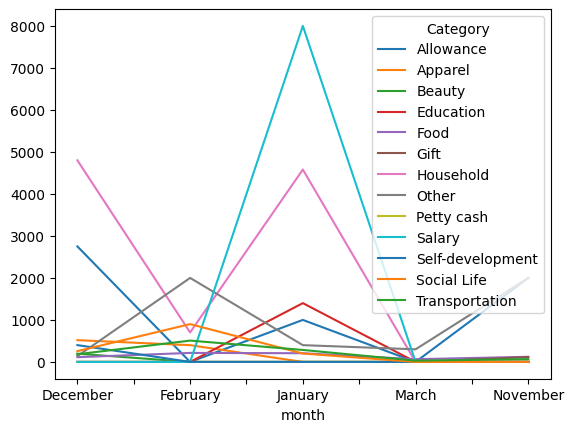

In [ ]:
expense.pivot_table(index='month',columns='Category',values='INR',fill_value=0).plot()

In [ ]:
####strings vectorised operation

a=np.array([1,2,3,4])
a*4

array([ 4,  8, 12, 16])

In [ ]:
#s=['cat','mat',None,'rat']

#[i.startswith('c') for i in s]

In [ ]:
#how pandas solve

s=pd.Series(['cat','mat',None,'rat'])
#string accessor
s.str.startswith('c')
# fast and optimised

,0
0,True
1,False
2,None
3,False


In [ ]:
df=pd.read_csv('/content/titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df['Name']

,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"
...,...
886,"Montvila, Rev. Juozas"
887,"Graham, Miss. Margaret Edith"
888,"Johnston, Miss. Catherine Helen ""Carrie"""
889,"Behr, Mr. Karl Howell"


In [ ]:
#string functions

df['Name'].str.lower()
df['Name'].str.upper()
df['Name'].str.title()
df['Name'].str.capitalize()
df['Name'].str.len()
df['Name'].str.split(',')
df['Name'].str.split(',').str.get(0)
df['Name'].str.split(',').str.get(1)
df['salutation']=df['Name'].str.split(',').str.get(1).str.split().str.get(0).value_counts()

In [ ]:
#replace


In [ ]:
"   shruti   ".strip()# removes leading and trailing spaces

'shruti'

In [ ]:
#df['salutation']=df['salutation'].str.replace('Ms','Miss')
df['salutation'].value_counts()
#df['salutation']=df['salutation'].str.replace('Mlle','Miss')

,count
salutation,


In [ ]:
df[df['Name'].str.startswith('A')]
df['Name'][df['Name'].str.startswith('A')]
df['Name'][df['Name'].str.endswith('A')]
df['Name'][df['Name'].str.contains('A')]
df[df['Name'].str.isdigit()]
df[df['Name'].str.isalpha()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,salutation


In [ ]:
df['Name'][df['Name'].str.contains('john',case=False) ]#case sensitive

,Name
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)"
41,"Turpin, Mrs. William John Robert (Dorothy Ann ..."
45,"Rogers, Mr. William John"
98,"Doling, Mrs. John T (Ada Julia Bone)"
112,"Barton, Mr. David John"
117,"Turpin, Mr. William John Robert"
160,"Cribb, Mr. John Hatfield"
162,"Bengtsson, Mr. John Viktor"
165,"Goldsmith, Master. Frank John William ""Frankie"""


In [ ]:
df['Name'][df['Name'].str.contains('^[aeiouAEIOU].+[aeiouAEIOU]$')]

,Name
30,"Uruchurtu, Don. Manuel E"
61,"Icard, Miss. Amelie"
68,"Andersson, Miss. Erna Alexandra"
84,"Ilett, Miss. Bertha"
114,"Attalah, Miss. Malake"
119,"Andersson, Miss. Ellis Anna Maria"
182,"Asplund, Master. Clarence Gustaf Hugo"
192,"Andersen-Jensen, Miss. Carla Christine Nielsine"
275,"Andrews, Miss. Kornelia Theodosia"
297,"Allison, Miss. Helen Loraine"


In [ ]:
df['Name'][df['Name'].str.contains('^a[a-z]*')]
df['Name'].str[:4]
df['Name'].str[::2]
df['Name'].str[: : -1]


,Name
0,"sirraH newO .rM ,dnuarB"
1,")reyahT sggirB ecnerolF( yeldarB nhoJ .srM ,sg..."
2,"aniaL .ssiM ,nenikkieH"
3,")leeP yaM yliL( htaeH seuqcaJ .srM ,ellertuF"
4,"yrneH mailliW .rM ,nellA"
...,...
886,"sazouJ .veR ,alivtnoM"
887,"htidE teragraM .ssiM ,maharG"
888,"""eirraC"" neleH enirehtaC .ssiM ,notsnhoJ"
889,"llewoH lraK .rM ,rheB"


Timestamp object and datetimeindex object

In [ ]:
pd.Timestamp('2023/1/5')
type(pd.Timestamp('2023/1/5'))

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
pd.Timestamp('2023-1-5')
pd.Timestamp('2023, 1, 5')


Timestamp('2023-01-05 00:00:00')

In [ ]:
pd.Timestamp('2023')
pd.Timestamp('5th January 2023  9:21AM')


Timestamp('2023-01-05 09:21:00')

In [ ]:
#datetime it belongs to python not pandas

import datetime as dt
dt.datetime(2023,1,5,9,21,56)
x=pd.Timestamp(dt.datetime(2023,1,5,9,21,56))
x
x.year #fetching attributes
x.month
x.day
x.hour
x.minute
x.second

56

In [ ]:
date=np.array('2023-01-01',dtype='datetime64[D]')
date

array('2023-01-01', dtype='datetime64[D]')

In [ ]:
date+np.arange(12)

array(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
       '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08',
       '2023-01-09', '2023-01-10', '2023-01-11', '2023-01-12'],
      dtype='datetime64[D]')

In [ ]:
#datetimeindex=collection of pandas timestamp
#from strings
pd.DatetimeIndex(['2023/1/1', '2022/1/1', '2021/1/1'])

DatetimeIndex(['2023-01-01', '2022-01-01', '2021-01-01'], dtype='datetime64[ns]', freq=None)

In [ ]:
type(pd.DatetimeIndex(['2023/1/1', '2022/1/1', '2021/1/1'])[0])

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
#using python datetime
pd.DatetimeIndex([dt.datetime(2023,1,1),dt.datetime(2022,1,1),dt.datetime(2021,1,1)])

DatetimeIndex(['2023-01-01', '2022-01-01', '2021-01-01'], dtype='datetime64[ns]', freq=None)

In [ ]:
#using timestamps
dt_index=pd.DatetimeIndex([pd.Timestamp(2023,1,1),pd.Timestamp(2022,1,1),pd.Timestamp(2021,1,1)])

In [ ]:
pd.Series([1,2,3],index=dt_index)

,0
2023-01-01,1
2022-01-01,2
2021-01-01,3


date range function

In [ ]:
pd.date_range('2023/1/1',periods=12,freq='D')
pd.date_range(start='2023/1/1',end='2023/2/1',freq='3D')

DatetimeIndex(['2023-01-01', '2023-01-04', '2023-01-07', '2023-01-10',
               '2023-01-13', '2023-01-16', '2023-01-19', '2023-01-22',
               '2023-01-25', '2023-01-28', '2023-01-31'],
              dtype='datetime64[ns]', freq='3D')

In [ ]:
#week days=bussiness days stands for B, freq=W one week per day
pd.date_range(start='2023/1/1',end='2023/2/1',freq='B')

DatetimeIndex(['2023-01-02', '2023-01-03', '2023-01-04', '2023-01-05',
               '2023-01-06', '2023-01-09', '2023-01-10', '2023-01-11',
               '2023-01-12', '2023-01-13', '2023-01-16', '2023-01-17',
               '2023-01-18', '2023-01-19', '2023-01-20', '2023-01-23',
               '2023-01-24', '2023-01-25', '2023-01-26', '2023-01-27',
               '2023-01-30', '2023-01-31', '2023-02-01'],
              dtype='datetime64[ns]', freq='B')

In [ ]:
# h-hourly data(factor)
pd.date_range(start='2023/1/1',end='2023/2/1',freq='H')
pd.date_range(start='2023/1/1',end='2023/2/1',freq='6H')

<ipython-input-97-b1b9701f51b5>:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  pd.date_range(start='2023/1/1',end='2023/2/1',freq='H')
<ipython-input-97-b1b9701f51b5>:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  pd.date_range(start='2023/1/1',end='2023/2/1',freq='6H')


DatetimeIndex(['2023-01-01 00:00:00', '2023-01-01 06:00:00',
               '2023-01-01 12:00:00', '2023-01-01 18:00:00',
               '2023-01-02 00:00:00', '2023-01-02 06:00:00',
               '2023-01-02 12:00:00', '2023-01-02 18:00:00',
               '2023-01-03 00:00:00', '2023-01-03 06:00:00',
               ...
               '2023-01-29 18:00:00', '2023-01-30 00:00:00',
               '2023-01-30 06:00:00', '2023-01-30 12:00:00',
               '2023-01-30 18:00:00', '2023-01-31 00:00:00',
               '2023-01-31 06:00:00', '2023-01-31 12:00:00',
               '2023-01-31 18:00:00', '2023-02-01 00:00:00'],
              dtype='datetime64[ns]', length=125, freq='6h')

to_datetime function

In [ ]:
s=pd.Series(['2023/1/1','2022/1/1','2021/1/1'])
pd.to_datetime(s).dt.year
s=pd.Series(['2023/1/1','2022/1/1','2021/130/1'])
pd.to_datetime(s,errors='coerce')

,0
0,2023-01-01
1,2022-01-01
2,NaT


In [ ]:
expense.head(2)

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1,month
0,2022-03-02 10:11:00,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0,March
1,2022-03-02 10:11:00,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0,March


In [ ]:
expense['Date']=pd.to_datetime(expense['Date'])
expense.info()
expense['year']=expense['Date'].dt.year
expense['month']=expense['Date'].dt.month
expense['day']=expense['Date'].dt.day
expense.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            277 non-null    datetime64[ns]
 1   Account         277 non-null    object        
 2   Category        277 non-null    object        
 3   Subcategory     0 non-null      float64       
 4   Note            273 non-null    object        
 5   INR             277 non-null    float64       
 6   Income/Expense  277 non-null    object        
 7   Note.1          0 non-null      float64       
 8   Amount          277 non-null    float64       
 9   Currency        277 non-null    object        
 10  Account.1       277 non-null    float64       
 11  month           277 non-null    int32         
 12  year            277 non-null    int32         
 13  day             277 non-null    int32         
dtypes: datetime64[ns](1), float64(5), int32(3), object(5)
memo

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1,month,year,day
0,2022-03-02 10:11:00,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0,3,2022,2
1,2022-03-02 10:11:00,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0,3,2022,2
2,2022-03-01 19:50:00,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0,3,2022,1
3,2022-03-01 18:56:00,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0,3,2022,1
4,2022-03-01 18:22:00,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0,3,2022,1


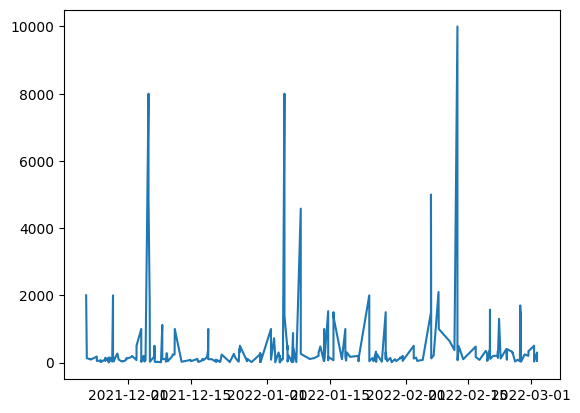

In [ ]:
import matplotlib.pyplot as plt
plt.plot(expense['Date'],expense['INR'])

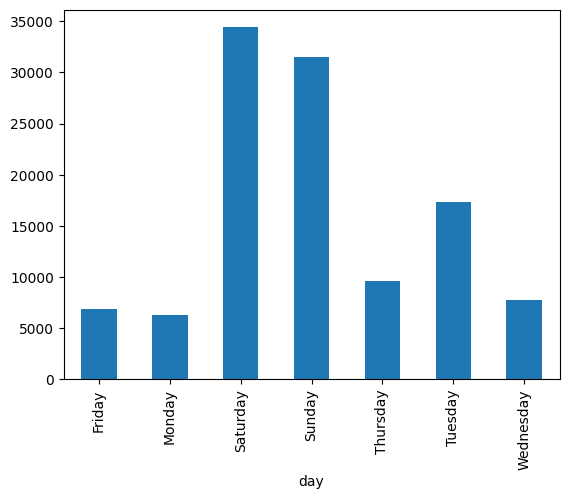

In [ ]:
expense['day']=expense['Date'].dt.day_name()
plot=expense.groupby('day')['INR'].sum().plot(kind='bar')